# GAN Generator Example

In [716]:
import torch
from torch import nn
import torch.nn.functional as F

In [717]:
# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

In [718]:
nz = 100
latent_vector = torch.randn(1, nz, 1, 1)
latent_vector.shape

torch.Size([1, 100, 1, 1])

In [719]:
conv1 = nn.ConvTranspose2d(in_channels=nz, out_channels=(ngf * 8), kernel_size=4, stride=1, padding=0, bias=False)
tensor = conv1(latent_vector)
tensor.shape

torch.Size([1, 512, 4, 4])

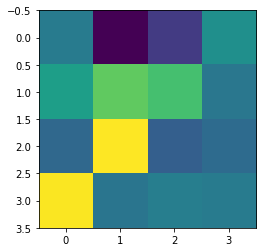

In [720]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [721]:
batch_norm1 = nn.BatchNorm2d(num_features=(ngf * 8))
tensor = batch_norm1(tensor)
tensor.shape

torch.Size([1, 512, 4, 4])

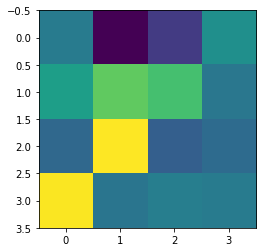

In [722]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [723]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 512, 4, 4])

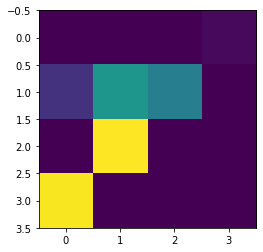

In [724]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [725]:
conv2 = nn.ConvTranspose2d(in_channels=(ngf * 8), out_channels=(ngf * 4), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv2(tensor)
tensor.shape

torch.Size([1, 256, 8, 8])

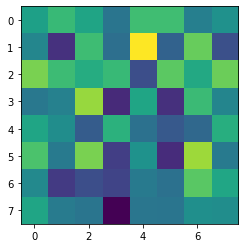

In [726]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [727]:
batch_norm2 = nn.BatchNorm2d(num_features=(ngf * 4))
tensor = batch_norm2(tensor)
tensor.shape

torch.Size([1, 256, 8, 8])

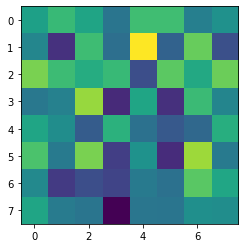

In [728]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [729]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 256, 8, 8])

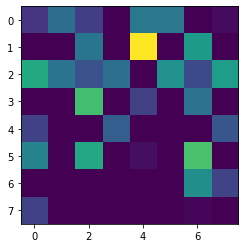

In [730]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [731]:
conv3 = nn.ConvTranspose2d(in_channels=(ngf * 4), out_channels=(ngf * 2), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv3(tensor)
tensor.shape

torch.Size([1, 128, 16, 16])

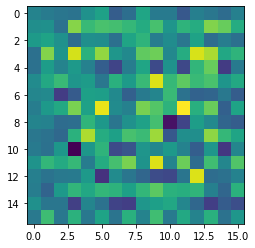

In [732]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [733]:
batch_norm3 = nn.BatchNorm2d(num_features=(ngf * 2))
tensor = batch_norm3(tensor)
tensor.shape

torch.Size([1, 128, 16, 16])

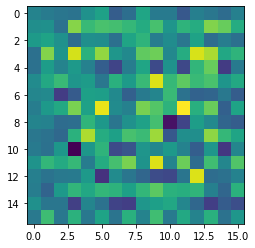

In [734]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [735]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 128, 16, 16])

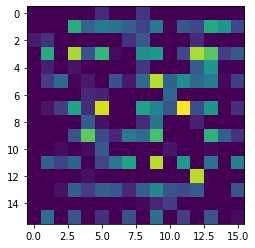

In [736]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [737]:
conv4 = nn.ConvTranspose2d(in_channels=(ngf * 2), out_channels=(ngf * 1), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv4(tensor)
tensor.shape

torch.Size([1, 64, 32, 32])

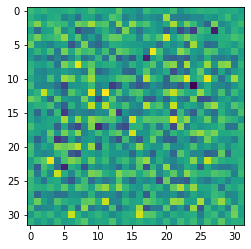

In [738]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [739]:
batch_norm4 = nn.BatchNorm2d(num_features=(ngf * 1))
tensor = batch_norm4(tensor)
tensor.shape

torch.Size([1, 64, 32, 32])

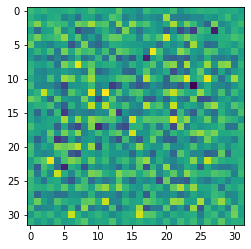

In [740]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [741]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 64, 32, 32])

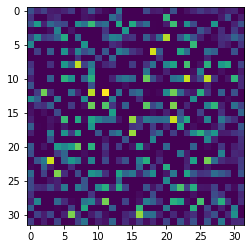

In [742]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [743]:
conv5 = nn.ConvTranspose2d(in_channels=(ngf * 1), out_channels=nc, kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv5(tensor)
tensor.shape

torch.Size([1, 3, 64, 64])

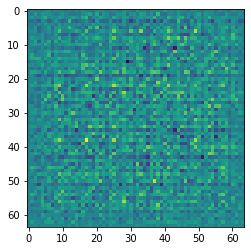

In [744]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

In [745]:
tensor = torch.tanh(tensor)
tensor.shape

torch.Size([1, 3, 64, 64])

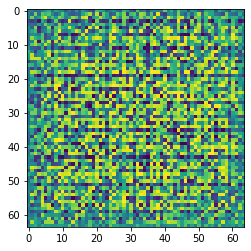

In [746]:
plt.imshow(tensor.detach().numpy()[0, 0, :, :])

## Generated Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


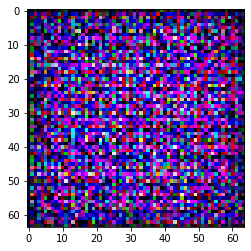

In [747]:
import matplotlib.pyplot as plt
%matplotlib inline

image = tensor.squeeze(0).detach()

plt.imshow(image.permute(1, 2, 0).numpy())

In [748]:
tensor.max()

tensor(0.9997, grad_fn=<MaxBackward1>)

In [749]:
tensor.min()

tensor(-0.9999, grad_fn=<MinBackward1>)